Healthcare Insurance Project

## Objectives
We got data source form Kaggle https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance.
Dataset contain different personal attributes and regional factors and their imapct on healthcare insurance charges.Study approaches for collecting different types of data from data source for healthcare insurance project.

## Inputs
It contains information on the relationship between personal attributes (age, gender, BMI: body mass index, family size, smoking habits), geographic factors, and their influence on medical insurance charges


## Outputs
Descriptive Statistics: Display basic statistics such as average insurance charges by age, gender, and region.
Correlation Analysis: Visualise correlations between different attributes and insurance charges.
Predictive Analysis: Develop and visualise predictive reports for estimating insurance costs.
Geographic Analysis: Visualise the impact of geographic regions on insurance charges.


## Additional Comments
 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [254]:
import os
current_dir = os.getcwd()
current_dir

'/'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [255]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [256]:
current_dir = os.getcwd()
current_dir

'/'

# Section 1

Extracting the datasource

In [257]:
import numpy as np    # importing numpy functions
import pandas as pd   # panda functions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder
df_insurance = pd.read_csv("/workspace/HealthcareInsurance_Project/insurance.csv") # reading file and extract data in tabular format
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


---

 Transform: Clean the data, handle missing values, encode categorical variables, and create new features such as body mass index (BMI) categories.

Section 2 content

In [258]:
df_insurance = df_insurance.drop_duplicates() # check for duplicates and remove them


In [259]:
df_insurance.isnull().sum()  # check for Missing values or data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [260]:
df_insurance = pd.read_csv("/workspace/HealthcareInsurance_Project/insurance.csv").filter(['sex', 'smoker','region'])
from feature_engine.imputation import DropMissingData
pipeline = Pipeline([
      ( 'drop_na', DropMissingData() ),
      ('ohe', OneHotEncoder(variables=['sex','smoker','region'], drop_last=True) )
])


df_insurance = pipeline.fit_transform(df_insurance)
df_insurance

,sex_female,smoker_yes,region_southwest,region_southeast,region_northwest
0,1,1,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
1333,0,0,0,0,1
1334,1,0,0,0,0
1335,1,0,0,1,0
1336,1,0,1,0,0


In [261]:
# Create new features such as body mass index (BMI) categories
df_insurance = pd.read_csv("/workspace/HealthcareInsurance_Project/insurance.csv")  # extracting data from datasource
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.0:
        return "Normal"
    elif 24.0 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

df_insurance['bmi_category'] = df_insurance['bmi'].apply(categorize_bmi)
# Optional transition - Encoding BMI categories as ordinal values
bmi_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df_insurance['bmi_category'] = df_insurance['bmi_category'].map(bmi_mapping)

print(df_insurance.head())  # Displays final output

   age     sex     bmi  children smoker     region      charges  bmi_category
0   19  female  27.900         0    yes  southwest  16884.92400             2
1   18    male  33.770         1     no  southeast   1725.55230             3
2   28    male  33.000         3     no  southeast   4449.46200             3
3   33    male  22.705         0     no  northwest  21984.47061             1
4   32    male  28.880         0     no  northwest   3866.85520             2


In [262]:
print(df_insurance[['sex', 'smoker', 'region', 'bmi_category']].dtypes)  # displays datatypes for given categories

sex             object
smoker          object
region          object
bmi_category     int64
dtype: object


In [263]:
categorical_vars = ['sex', 'smoker', 'region', 'bmi_category']
df_insurance[categorical_vars] = df_insurance[categorical_vars].astype('category')  # method returns data types has been changed to the specified type.

In [264]:
print(df_insurance[categorical_vars].dtypes)  # displays changed data types for variable

sex             category
smoker          category
region          category
bmi_category    category
dtype: object


In [265]:
print(df_insurance[['sex', 'smoker', 'region', 'bmi_category']].isnull().sum()) # Displays any missing value for given categories

sex             0
smoker          0
region          0
bmi_category    0
dtype: int64


In [266]:
for col in categorical_vars:
    print(col, df_insurance[col].unique())

sex ['female', 'male']
Categories (2, object): ['female', 'male']
smoker ['yes', 'no']
Categories (2, object): ['no', 'yes']
region ['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
bmi_category [2, 3, 1, 0]
Categories (4, int64): [0, 1, 2, 3]


In [267]:
for col in categorical_vars:
    df_insurance[col] = df_insurance[col].astype(str)

In [268]:
from feature_engine.imputation import DropMissingData
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('ohe', OneHotEncoder(variables=['sex', 'smoker', 'region', 'bmi_category'], drop_last=True))
])

df_transformed = pipeline.fit_transform(df_insurance)
print(df_transformed)

      age     bmi  children      charges  sex_female  smoker_yes  \
0      19  27.900         0  16884.92400           1           1   
1      18  33.770         1   1725.55230           0           0   
2      28  33.000         3   4449.46200           0           0   
3      33  22.705         0  21984.47061           0           0   
4      32  28.880         0   3866.85520           0           0   
...   ...     ...       ...          ...         ...         ...   
1333   50  30.970         3  10600.54830           0           0   
1334   18  31.920         0   2205.98080           1           0   
1335   18  36.850         0   1629.83350           1           0   
1336   21  25.800         0   2007.94500           1           0   
1337   61  29.070         0  29141.36030           1           1   

      region_southwest  region_southeast  region_northwest  bmi_category_2  \
0                    1                 0                 0               1   
1                    0     

In [269]:
# Descriptive Statistics: Display basic statistics such as average insurance charges by age, gender, and region.
avg_by_age = df_insurance.groupby('age')['charges'].mean().reset_index()   #average insurance charges by age
print("Average Insurance Charges by Age:")
print(avg_by_age)


Average Insurance Charges by Age:
    age       charges
0    18   7086.217556
1    19   9747.909335
2    20  10159.697736
3    21   4730.464330
4    22  10012.932802
5    23  12419.820040
6    24  10648.015962
7    25   9838.365311
8    26   6133.825309
9    27  12184.701721
10   28   9069.187564
11   29  10430.158727
12   30  12719.110358
13   31  10196.980573
14   32   9220.300291
15   33  12351.532987
16   34  11613.528121
17   35  11307.182031
18   36  12204.476138
19   37  18019.911877
20   38   8102.733674
21   39  11778.242945
22   40  11772.251310
23   41   9653.745650
24   42  13061.038669
25   43  19267.278653
26   44  15859.396587
27   45  14830.199856
28   46  14342.590639
29   47  17653.999593
30   48  14632.500445
31   49  12696.006264
32   50  15663.003301
33   51  15682.255867
34   52  18256.269719
35   53  16020.930755
36   54  18758.546475
37   55  16164.545488
38   56  15025.515837
39   57  16447.185250
40   58  13878.928112
41   59  18895.869532
42   60  21979.41850

In [270]:
avg_by_gender = df_insurance.groupby('sex')['charges'].mean().reset_index()  #average insurance charges by sex
print("\nAverage Insurance Charges by Gender:")
print(avg_by_gender)



Average Insurance Charges by Gender:
      sex       charges
0  female  12569.578844
1    male  13956.751178


In [271]:
avg_by_region = df_insurance.groupby('region')['charges'].mean().reset_index()   #average insurance charges by region
print("\nAverage Insurance Charges by Region:")
print(avg_by_region)


Average Insurance Charges by Region:
      region       charges
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377


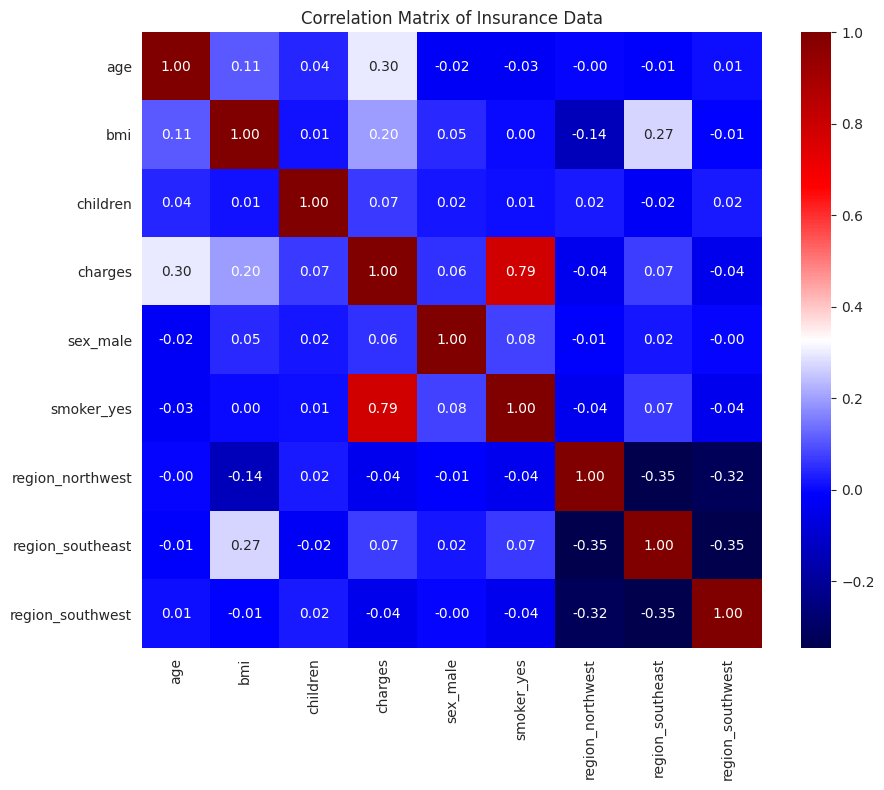

In [272]:
# Correlation Analysis: Visualise correlations between different attributes and insurance charges.
df_insurance_encoded = pd.get_dummies(df_insurance,columns=['sex', 'smoker', 'region'], drop_first=True) # Converting categorical variables to numerical form for correlation Analysis
correlation_matrix = df_insurance_encoded.corr()
plt.figure(figsize=(10, 8))                                   # Plot heatmap for the given dataset
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="seismic")
plt.title("Correlation Matrix of Insurance Data")
plt.show()

In [273]:
# Predictive Analysis: Develop and visualise predictive reports for estimating insurance costs.


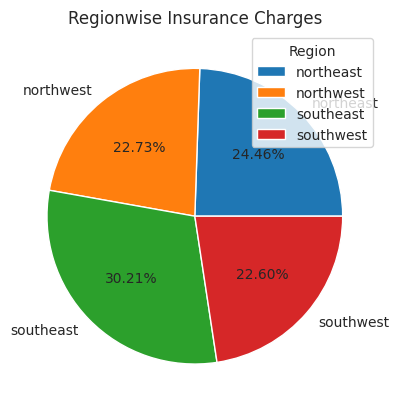

In [274]:
# Geographic Analysis: Visualise the impact of geographic regions on insurance charges.
region_charges = df_insurance.groupby(['region'])['charges'].sum().reset_index()
plt.pie(region_charges['charges'], labels = region_charges['region'], autopct='%1.2f%%')
plt.legend(title='Region')
plt.title('Regionwise Insurance Charges')
plt.show()

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [275]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
 print(e)


IndentationError: expected an indented block (3480282049.py, line 5)